### <p style="text-align: right;"> &#9989; Jalin Lewis</p>

# CMSE Homework 05


### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are 25 points possible on this assignment. Point values for each part are included in the section headers.

This assignment is due roughly two weeks from now at 11:59 pm on **Friday March 27**. It should be uploaded into the "Homework Assignments" submission folder for Homework #5 in your D2L webpage. Submission instructions can be found at the end of the notebook.

**Hint**: It is possible you are asked to do something you are not familiar with. That's why you have internet access. Do some smart searches and see what you can find! 

## Part 1: Setting up a repository for tracking changes (3 points)

For this assignment, you're going to add it to the cmse202-s20-turnin repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

* Navigate to your `cmse202-s20-turnin` repository and create a new directory called `hw-05`.
* Move this notebook into that new directory in your repository, then add it and commit it to your repository.
 * Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

Important: Make sure you've added your PTA as a collaborators\ to your "turnin" respository with "Read" access so that we can see your assignment.

* Section 001: nchamusah14
* Section 002: nchamusah14
* Section 003: genster6

Also important: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, none of your changes will be tracked.

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s20-turnin` repository under the `hw-05` directory that you just created. Periodically, you'll be asked to commit your changes to the repository and push them to the remote GitHub location. Of course, you can always commit your changes more often than that, if you wish. It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

## Part 2: Load and Plot the Data (7 points)

In this homework we will be woking with the wine dataset and building a k-nearest neighbors classifier class. The first step is to load the data and plot the labels.

**Question 2.1 (2 points)** Load the *wine_data.csv* as a pandas dataframe and select the follwing three cloumns; Class label, Alcohol, Malic acid 

In [5]:
### Put your code here ###
import pandas as pd
wine = pd.read_csv("wine_data.csv", usecols = (0,1,2))
wine

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


**Question 2.2 (2 points)** Find the number of unqiue entries in the Class label column

In [8]:
### Put your code here ###
wine["Class label"].unique()

array([1, 2, 3])

**Question 2.3 (3 points)** Make a scatter plot including every sample in the dataset with: the Alcohol feature on the x-axis, the Malic acid feature on the y-axis, and different colors for each class label

Text(0, 0.5, 'Malic acid')

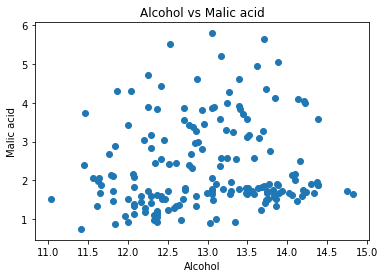

In [11]:
### Put your code here ###
import matplotlib.pyplot as plt

plt.scatter(wine["Alcohol"], wine["Malic acid"])
plt.title("Alcohol vs Malic acid")
plt.xlabel("Alcohol")
plt.ylabel("Malic acid")

# k-Nearest Neighbors

In the next part we will be building a class that will use the k-nearest neighbors algorithm (kNN) to make predictions on the wine data. kNN makes a prediction for a test sample by first finding the top-k "closest" samples in the training set. The predcition is then given by finding the class label that is the most popular among the top-k samples. For more information see:

1. https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


## Part 3: Prepare data and make predictions (12 points)

**Question 3.1 (2 points)** Apply the "train_test_split" function in the *sklearn* package to split the data in 70% for training and 30% for testing. Class label will be the target variable. Alcohol and Malic acid will be the features. Using common variable names like X_train, y_train, X_test and y_test might help later.

In [12]:
### Put your code here ###
from sklearn.model_selection import train_test_split


train_vectors, test_vectors, train_labels, test_labels = train_test_split(wine["Alcohol"],wine["Malic acid"],test_size=0.30)
print(len(train_vectors))
print(len(test_vectors))

124
54


**Question 3.2 (2 points)** We are now going to build a Class that will act as a k-nearest neighbor classifer. First, make a class called kNN and have the \__init__ method take a single argument, k, the number of samples in the training set to use for prediction. Once this is done, instantiate a class with k = 5.

In [41]:
### Put your code here ###
class kNN:
    def __init__(self, k):
        self.k = k 

this_kNN = kNN(5)

**Question 3.3 (2 points)** Next, we need to load some training data into the classifer. Do this by writing a new method in the kNN class called get_train_data. The method will take two arguments, the first is the training data containing the features and the other is the traning data that contains the class labels. Instantiate the class with the relavent data arrays from Question 3.1.

In [46]:
### Put your code here ###
class kNN:
    def __init__(self, samp):
        self.k = k 
        
    def get_train_data(self,features, class_labels):
        self.x_train_data = features
        self.test_train_data = class_labels


get_data = kNN.get_train_data(wine["Alcohol"], wine["Malic acid"])

TypeError: get_train_data() missing 1 required positional argument: 'class_labels'

**Question 3.4 (4 points)** Now we are going to add a method called _predict_ that takes one input, the test data for the feautres (X_test) and will return a list/array of the class label predicted for each test sample. The top k-neighbors will be selected based on the euclidean distance. One way of thinking of how to break this down into smaller steps is: 

1. For a single test sample, find the euclidean distance to all of the training samples (can use a for loop). For this feel free to use the "euclidean" function from the _scipy.spatial.distance_ package.
2. Find which traning samples are the top-k closest to the test sample, and then find the class labels for those top-k samples. Then find out which class label occurs the most (if two or more classes occur equally as the most than randomaly pick one). Hint using the function "np.argsort" might be useful to map the sorting of the distances to the class labels.
3. Once this works, put this inside another loop that goes through and does this for all the samples in the test set.

Note for this question and the next, you can use "KNeighborsClassifier" from _sklearn.neighbors_ to see if your answer agrees, but you need to write your own class methods to recieve credit. The default parameters of "KNeighborsClassifier" are the euclidean distance (i.e.  p=2, metric='minkowski' is the same as the euclidean distance). Also the "fit" method in the sklearn version does the same thing as the "get_train_data" method in the kNN class.


In [38]:
### Put your code here ###

class kNN:
    def __init__(self, samp):
        self.k = k 
        
    def get_train_data(self, features, class_labels):
        self.x_train_data = features
        self.test_train_data = class_labels
    def predict(self, x_test_dat):
        self.x_test_dat = x_test_dat
        y_predict = []
        for val in self.x_test_dat:
            test_list = list(zip(self.x_test_dat['Alcohol'], self.x_test_dat["Malic Acid"]))
        for val in self.x_test_dat:
            train_list = list(zip(self.x_train_dat['Alcohol'], self.x_train_dat["Malic Acid"]))
            
        for test_pair in test_list:
            distance_list = []
            for train_pair in train_list:
                distance_list.append(distance.euclidean(np.array(train_pair), np.array(test_pair)))
            predict_list = list(zip(self.y_train_dat, distance_list))
            predict_list.sort(reverse = False, key = lambda x: x[1])
            k_nearest = pred_list[0:self.k]
            predict_value_list = []
            for val in k_nearest:
                predict_value_list.append(val[0])
            value1 = [1,predict_value_list.count(1)]
            value2 = [2,predict_value_list.count(2)]
            value3 = [1,predict_value_list.count(3)]
            if max([value1[1],value2[1],value3[1]]) == value1[1]:
                y_predict_value = 1
            elif max([value1[1],value2[1],value3[1]]) == value2[1]:
                y_predict_value = 2
            else:
                y_predict_value = 3
            y_predict.append(y_predict_value)
        return y_predict
y_predict = kNN      
print(y_predict)

<class '__main__.kNN'>


**Question 3.5 (2 points)** Take the predcitions and calculate the accuracy using the "accuracy_score" function from the _sklearn.metrics_ package.

In [16]:
### Put your code here ###


## Part 4: Finding which hyperparameter works the best. (3 points)

Almost all machine learning models have hyperparamters. Hyperparameters are setting(s) in the model that the user needs to choose before learning takes place. For example, in the perceptron model, the learning rate is something that needs to be set by the user before hand. In k-nearest neighbors, the number of neighbors to consider (k), is the hyperparameter. An important task in machine learning is hyperparameter tuning, which is finding the optimal hyperparmeter. In this section, we will generate a plot of the accuracy of a number of different choices of k

**Question 4.1 (3 points)** Here, find the accuracy of the kNN model for the following values of k; 1, 5, 10, 50, 100 and make a plot of the accuracy versus these values of k.

If you were not able to get the class in Part 3 working, you can use "KNeighborsClassifier" from _sklearn.neighbors_ for this question and get full credit. Note, the default parameters of "KNeighborsClassifier" are the euclidean distance (i.e.  p=2, metric='minkowski' is the same as the euclidean distance).


In [ ]:
### Put your code here ###



---
### Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [1]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://docs.google.com/forms/d/e/1FAIpQLSe0NSZaTZS977kVn0JwUPYnvmqWliTlbM3eeF1qI8SxLpWcRw/viewform?usp=sf_link" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #5, and upload your notebook **and the script you wrote**.